# Lab 7 - Clustering Part I

## K-means clustering - example I

K-means clustering will divide data in k clusters, each with its own center. The algorithm works iteratively to group together data points that are spatially closer to one-another.

We will generate a synthetic data set that has natural clusters and then will use clustering functions to see how it works.

Here is the function that will create the synthetic data:

Ex.1 Please analyse the function parameters and generated output.

In [1]:
from sklearn.datasets import make_blobs 
 
help(make_blobs)

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, default=100
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
        .. versionchanged:: v0.20
            one can now pass an array-like to the ``n_samples`` parameter
    
    n_features : int, default=2
        The number of features for each sample.
    
    centers : int or ndarray of shape (n_centers, n_features), default=None
        The number of centers to generate, or the fixed center locations.
        If n_samples 

Ex.2 Please call make_blob and generate a dataset with 120 samples, 2 features, 4 centres (clusters), and cluster_std=0.40. 

In [2]:
X, y = make_blobs(n_samples = 120, n_features = 2, centers = 4, cluster_std = 0.4)

Ex.3 Analyse the x and y shape.

In [3]:
print(X.shape)
print(y.shape)

(120, 2)
(120,)


Ex.4 Plot the data samples in X to see the clusters.

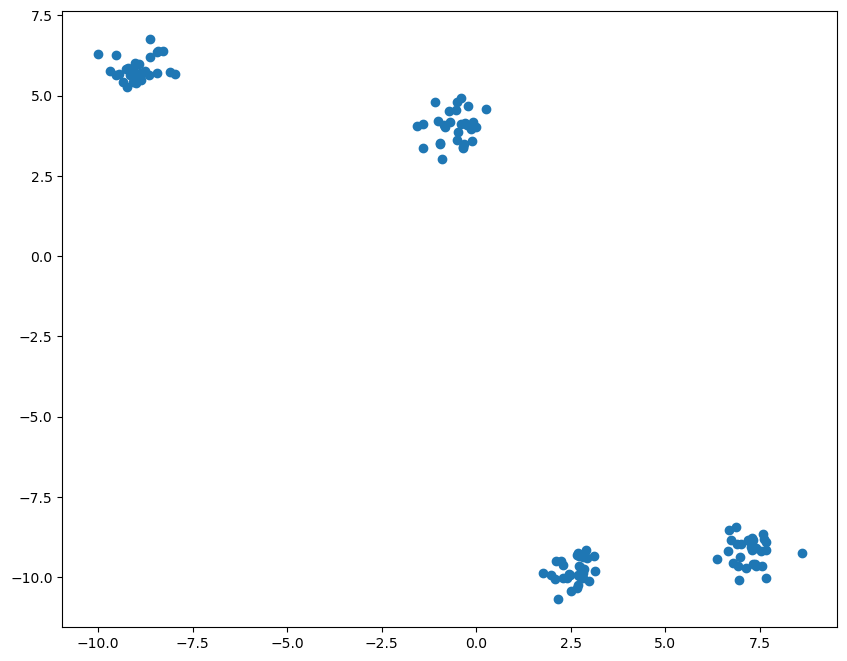

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1])

Ex.5 Run the implemented KMeans function K-Means, fit the model and predict the outcome.

In [5]:
from sklearn.cluster import KMeans

model = KMeans(init = "random", n_clusters = 4)
model.fit(X, y)
y_pred = model.predict(X)
y_pred

array([3, 2, 3, 2, 2, 0, 3, 1, 0, 1, 1, 3, 3, 1, 1, 2, 1, 0, 0, 3, 3, 2,
       3, 2, 2, 0, 2, 1, 2, 2, 3, 3, 2, 3, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 2, 1, 1, 1, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 1, 3, 2, 0, 3, 2, 3,
       3, 0, 3, 0, 1, 2, 2, 0, 3, 1, 3, 2, 1, 0, 1, 0, 2, 2, 0, 2, 0, 2,
       2, 2, 3, 0, 1, 0, 3, 1, 1, 0, 0, 1, 2, 3, 1, 3, 2, 0, 3, 0, 3, 2,
       3, 1, 3, 0, 2, 1, 2, 2, 0, 3], dtype=int32)

Ex.6 Plot the results in order to see whether the clustering worked.

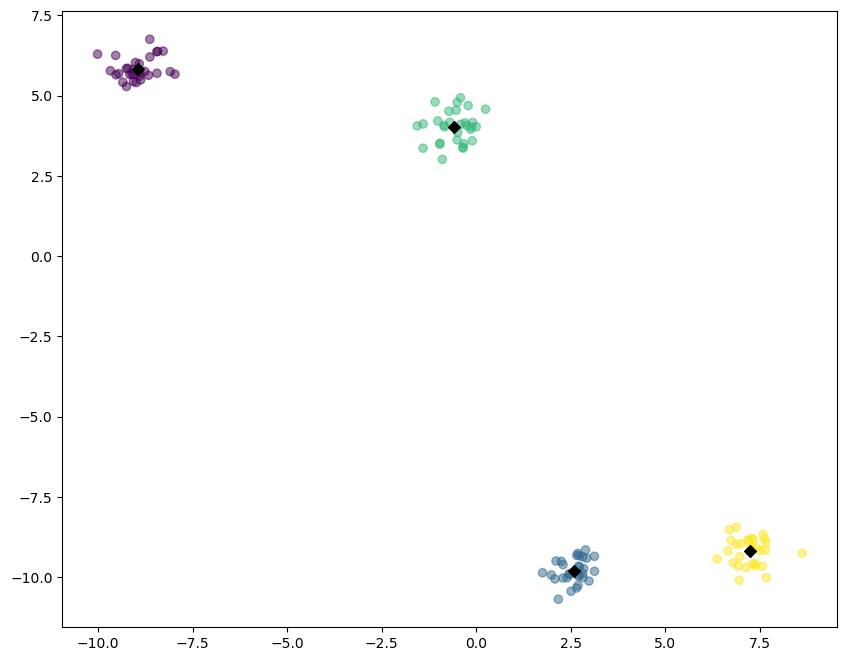

In [6]:
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c = y_pred, alpha = 0.5)

centroids = model.cluster_centers_
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

plt.scatter(centroids_x, centroids_y, c = "black", marker = "D")
plt.show()

Ex.7 Calculate inertia Inertia_ or Dunn index Package jgmcvi (optional).

In [7]:
print("Inertia:", model.inertia_)

Inertia: 40.6068317068285


## K-means clustering - example II

Change the parameters of our data generation process to create different-looking clusters (eg. about 5 clusters and cluster_std=0.8).

In [8]:
X, y = make_blobs(n_samples = 120, n_features = 2, centers = 5, cluster_std = 0.8)

Ex.1 Plot the data

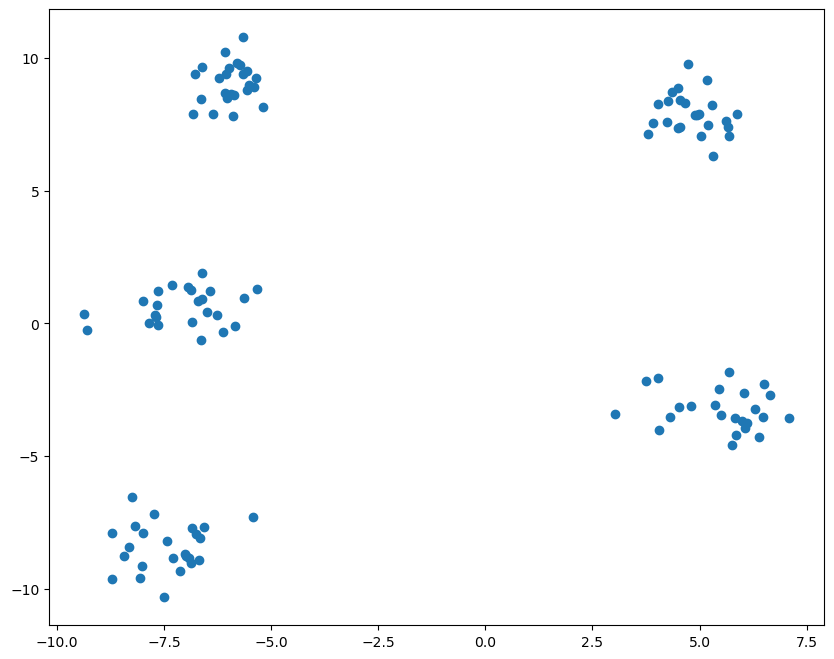

In [9]:
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1])

Ex.2 Predict for the same nb. of clusters = 5.

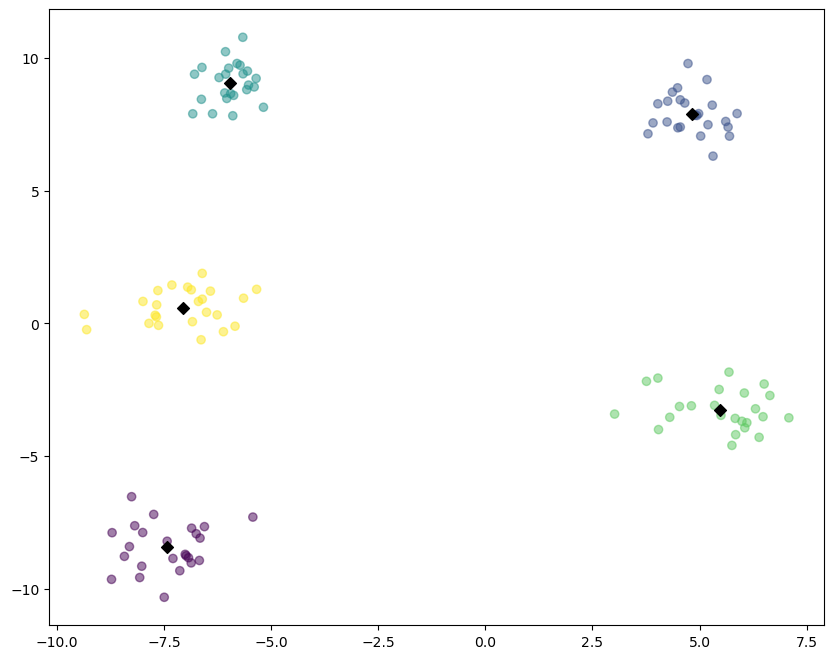

In [10]:
model_5 = KMeans(init = "random", n_clusters = 5)
model_5.fit(X, y)
y_pred = model_5.predict(X)

plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c = y_pred, alpha = 0.5)

centroids = model_5.cluster_centers_
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

plt.scatter(centroids_x, centroids_y, c = "black", marker = "D")
plt.show()

Ex.3 Predict for 2 instead of 5 clusters.

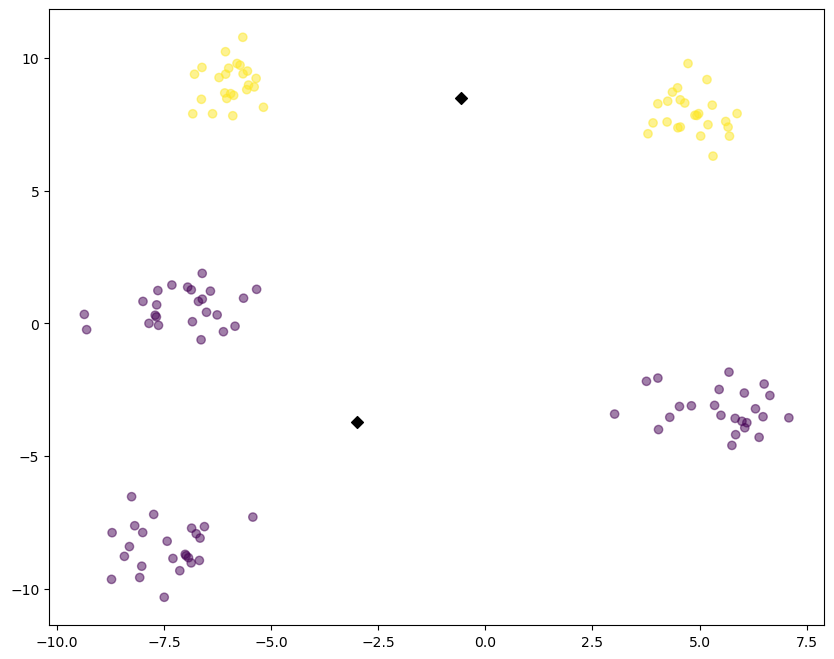

In [11]:
model_2 = KMeans(init = "random", n_clusters = 2)
model_2.fit(X, y)
y_pred = model_2.predict(X)

plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c = y_pred, alpha = 0.5)

centroids = model_2.cluster_centers_
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

plt.scatter(centroids_x, centroids_y, c = "black", marker = "D")
plt.show()

Ex.4 Calculate inertia or Dunn index (optiona).

In [12]:
print("Inertia with 5 clusters:", model_5.inertia_)
print("Inertia with 2 clusters:", model_2.inertia_)

Inertia with 5 clusters: 143.18125514535748
Inertia with 2 clusters: 5128.642738499386


## K-means ++

Remember how we randomly initialize the centroids in k-means clustering? This is also potentially problematic because we might get different clusters every time. So, to solve this problem of random initialization, there is an algorithm called K-Means++ that can be used to choose the initial values (discussed during the lecture). In latest version of sklearn library kmeans++ method is the default version. In this case, change it to a random one and compare the results.

Ex.1 Run K-Means for the previous ex. while changing the parameter in KMeans function:

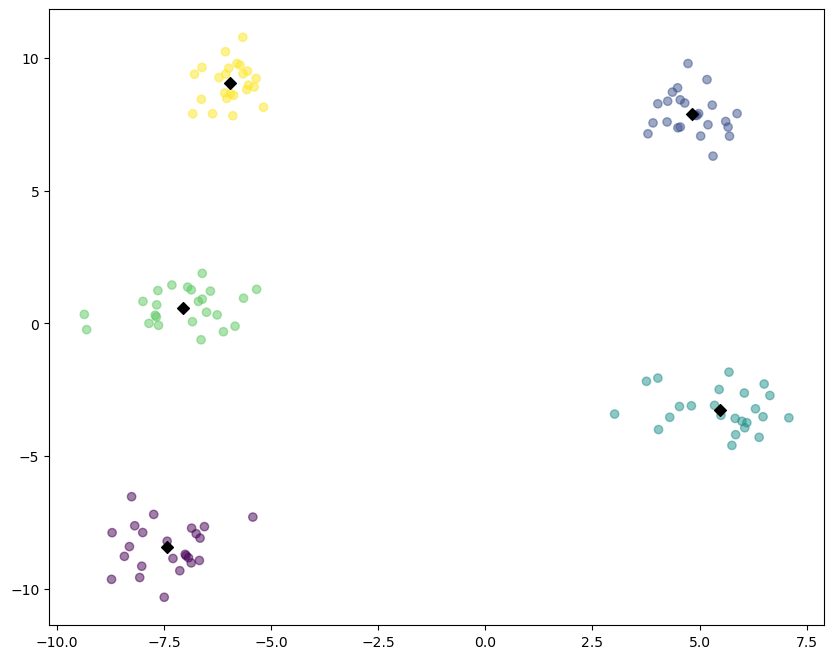

In [13]:
# With 5 clusters

model_5_plus = KMeans(init = "k-means++", n_clusters = 5)
model_5_plus.fit(X, y)
y_pred = model_5_plus.predict(X)

plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c = y_pred, alpha = 0.5)

centroids = model_5_plus.cluster_centers_
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

plt.scatter(centroids_x, centroids_y, c = "black", marker = "D")
plt.show()

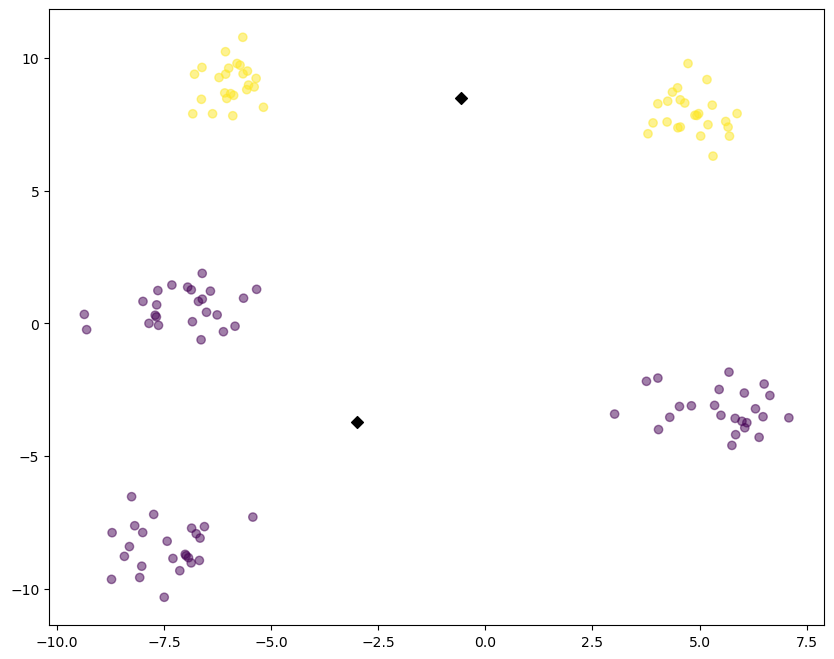

In [14]:
# With 2 clusters

model_2_plus = KMeans(init = "k-means++", n_clusters = 2)
model_2_plus.fit(X, y)
y_pred = model_2_plus.predict(X)

plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c = y_pred, alpha = 0.5)

centroids = model_2_plus.cluster_centers_
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

plt.scatter(centroids_x, centroids_y, c = "black", marker = "D")
plt.show()

In [15]:
print("Inertia with 5 clusters:", model_5.inertia_)
print("Inertia with 5 clusters (K-means ++):", model_5_plus.inertia_)
print(" ")
print("Inertia with 2 clusters:", model_2.inertia_)
print("Inertia with 2 clusters (K-means ++):", model_2_plus.inertia_)

Inertia with 5 clusters: 143.18125514535748
Inertia with 5 clusters (K-means ++): 143.18125514535748
 
Inertia with 2 clusters: 5128.642738499386
Inertia with 2 clusters (K-means ++): 5128.642738499386


## Elbow method

Please implement the elbow method to choose the correct parameter value for k.

Ex.1 Run K-Means for a range of clusters using a for loop and collecting the distortions (inertia) into a list.

Ex.2 Plot the distortions of K-Means.

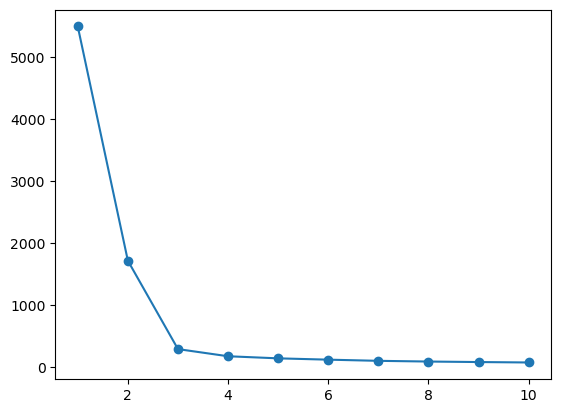

In [30]:
X, y = make_blobs(n_samples=120, n_features=2, centers=5, cluster_std=0.8)

inertia = []

for i in range(1, 11):
    model = KMeans(init = "k-means++", n_clusters = i)
    model.fit(X, y)
    inertia.append(model.inertia_)

plt.plot(range(1, 11), inertia, marker = "o")

Maximum number of a clusters is 20 Please check whether the K-Means algorithm will correctly cluster the data:

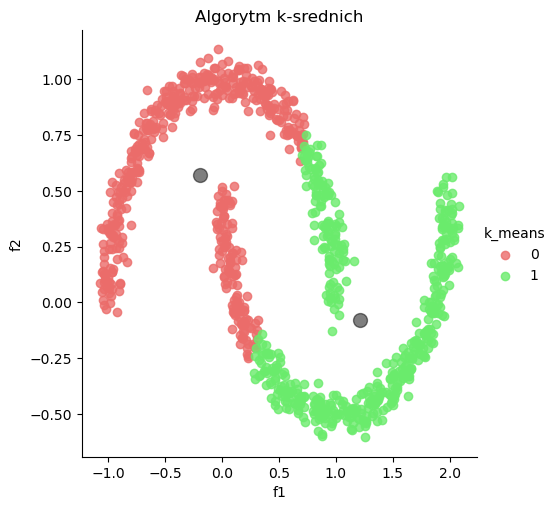

In [29]:
from sklearn.datasets import make_moons
import seaborn as sns
import pandas as pd
 
X, y = make_moons(1000, noise=.05, random_state=0)
X_moon = pd.DataFrame(X, columns = ['f1','f2'])

#TODO: Kmeans
model = KMeans(init = 'k-means++', n_clusters = 2)
model.fit(X, y)
y_pred = model.predict(X)
centers = model.cluster_centers_

#Plot
X_moon['k_means'] = y_pred
sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue = 'k_means', palette = ['#eb6c6a', '#6aeb6c']).set(title='Algorytm k-srednich')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
plt.show()